In [1]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline

#time
import datetime as datetime

#Prophet
from fbprophet import Prophet


from sklearn import metrics

import warnings

### 去除煩人的 warrning
warnings.filterwarnings('ignore')

In [2]:
stock = input('輸入股票代碼：')
print(type(stock))
stock = stock + '.TW'
print(stock)

輸入股票代碼：2330
<class 'str'>
2330.TW


In [3]:
start = datetime.datetime(2015,1,5)

df = pdr.DataReader(stock, 'yahoo', start=start)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,140.5,137.5,140.5,139.5,32046000.0,117.563866
2015-01-06,137.5,133.0,137.5,133.5,66778000.0,112.507347
2015-01-07,135.0,133.5,133.5,134.0,43703000.0,112.928734
2015-01-08,138.0,136.0,136.5,138.0,42491000.0,116.299728
2015-01-09,135.5,133.0,135.0,134.0,61558000.0,112.928734
2015-01-12,133.5,132.0,132.5,132.0,30338000.0,111.243225
2015-01-13,133.0,130.5,131.0,132.5,37818000.0,111.664604
2015-01-14,133.0,130.0,132.5,130.0,48740000.0,109.557724
2015-01-15,133.0,131.5,131.5,131.5,40607000.0,110.821861


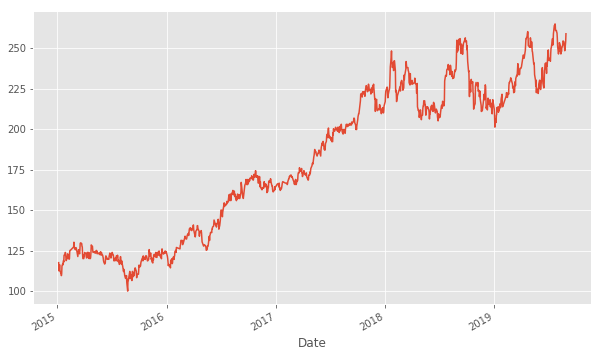

In [4]:
plt.style.use('ggplot')
df['Adj Close'].plot(figsize=(10, 6));

In [5]:
new_df = pd.DataFrame(df['Adj Close']).reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
new_df.head()

,ds,y
0,2015-01-05,117.563866
1,2015-01-06,112.507347
2,2015-01-07,112.928734
3,2015-01-08,116.299728
4,2015-01-09,112.928734


In [6]:
new_df['y'] = np.log(new_df['y'])
# 定義模型
model = Prophet()

# 訓練模型
model.fit(new_df)

# 建構預測集
future = model.make_future_dataframe(periods=365) #預測365天

# 進行預測
forecast = model.predict(future)
forecast.head()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-05,4.830472,4.711261,4.780841,4.830472,4.830472,-0.086290,-0.086290,-0.086290,0.013959,0.013959,0.013959,-0.100249,-0.100249,-0.100249,0.0,0.0,0.0,4.744182
1,2015-01-06,4.830246,4.710172,4.777017,4.830246,4.830246,-0.085607,-0.085607,-0.085607,0.014580,0.014580,0.014580,-0.100187,-0.100187,-0.100187,0.0,0.0,0.0,4.744639
2,2015-01-07,4.830020,4.707993,4.780794,4.830020,4.830020,-0.084747,-0.084747,-0.084747,0.015125,0.015125,0.015125,-0.099871,-0.099871,-0.099871,0.0,0.0,0.0,4.745274
3,2015-01-08,4.829794,4.712109,4.778763,4.829794,4.829794,-0.083849,-0.083849,-0.083849,0.015442,0.015442,0.015442,-0.099292,-0.099292,-0.099292,0.0,0.0,0.0,4.745945
4,2015-01-09,4.829568,4.713760,4.780002,4.829568,4.829568,-0.083592,-0.083592,-0.083592,0.014851,0.014851,0.014851,-0.098443,-0.098443,-0.098443,0.0,0.0,0.0,4.745976


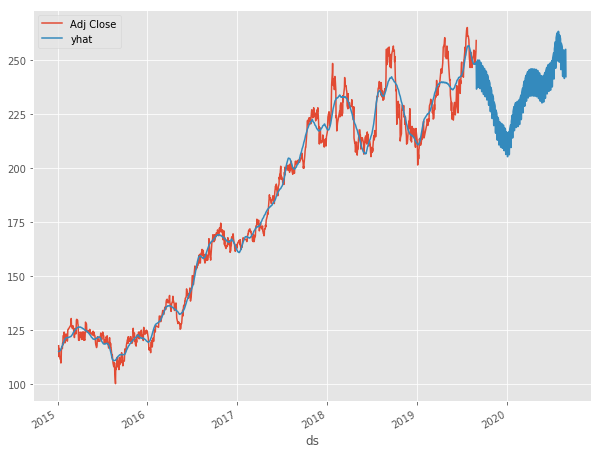

In [8]:
df_close = pd.DataFrame(df['Adj Close'])
two_years = forecast.set_index('ds').join(df_close)
#two_years = two_years[['Adj Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(1000)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['Adj Close', 'yhat']].plot(figsize=(10, 8));

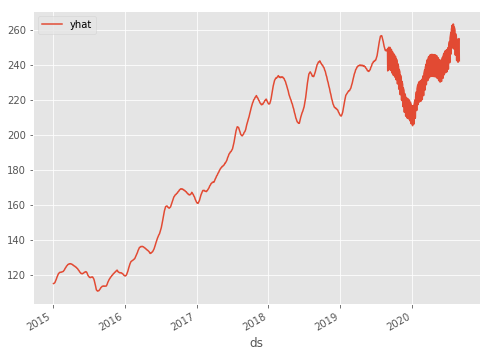

In [9]:
two_years[[ 'yhat']].plot(figsize=(8, 6));

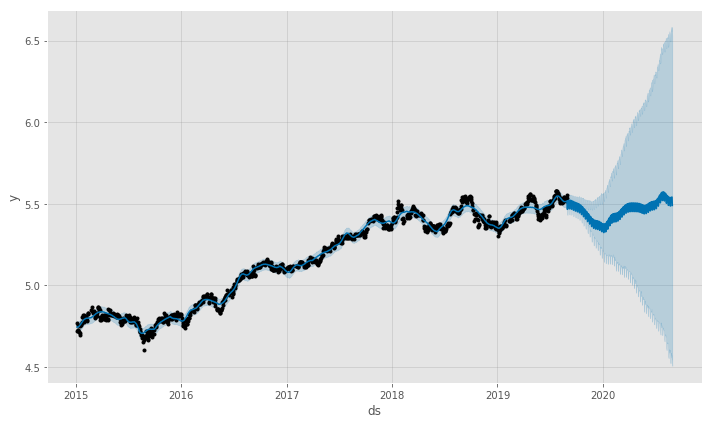

In [11]:
figure=model.plot(forecast)

In [51]:
print('yhat')

yhat


In [1]:
!jupyter nbconvert --to script prophet_ver1.ipynb

[NbConvertApp] Converting notebook prophet_ver1.ipynb to script
[NbConvertApp] Writing 1588 bytes to prophet_ver1.py


Text(0.5, 0, 'Date')

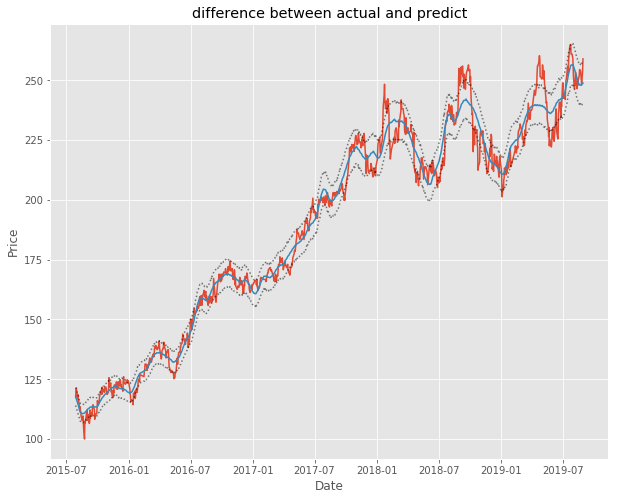

In [14]:
two_years = two_years[['Adj Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(1000)
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(two_years['Adj Close'])
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('difference between actual and predict')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [15]:
two_years_AE = (two_years.yhat - two_years['Adj Close'])
two_years_AE.describe()

count    1000.000000
mean       -0.067385
std         5.510998
min       -22.536839
25%        -2.916564
50%        -0.215888
75%         2.964223
max        20.667647
dtype: float64

In [16]:
print ("MSE:",metrics.mean_squared_error(two_years.yhat, two_years['Adj Close']))
print ("MAE:",metrics.mean_absolute_error(two_years.yhat, two_years['Adj Close']))

MSE: 30.34527341989915
MAE: 4.051946751126816
